# Wine 데이터셋

In [7]:
# 오류
import warnings
warnings.filterwarnings('ignore')

In [8]:
# 기본
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

## KNN

In [9]:
red_df = pd.read_csv(r"C:\pythondata\기계학습_함건희교수_금123\winequality-red.csv", sep = ';', header = 0, engine = 'python')
white_df = pd.read_csv(r"C:\pythondata\기계학습_함건희교수_금123\winequality-white.csv", sep = ';', header = 0, engine = 'python')

In [10]:
# 각 데이터에 레드/화이트 와인을 구별할 수 있는 type 변수 추가
red_df['class'] = 0
white_df['class'] = 1

In [11]:
wine = pd.concat([red_df, white_df])
wine.shape

(6497, 13)

In [12]:
## 변수 공간 제거 (빈공간 '_' (under score)로 변경)
wine.columns = wine.columns.str.replace(' ', '_')
wine.columns # 변경된 변수명 확인

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [13]:
# 데이터 내보내기 (export)
wine.to_csv(r"C:\Users\LG\Desktop\wine.csv", index=False)

In [14]:
# 독립변수와 종속변수 분리
X = wine[['alcohol', 'residual_sugar', 'pH']]
Y = pd.DataFrame(wine['class'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4547, 3) (1950, 3) (4547, 1) (1950, 1)


In [17]:
import sklearn.preprocessing as preprocessing

In [18]:
# 변수 값 정규화
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn import neighbors

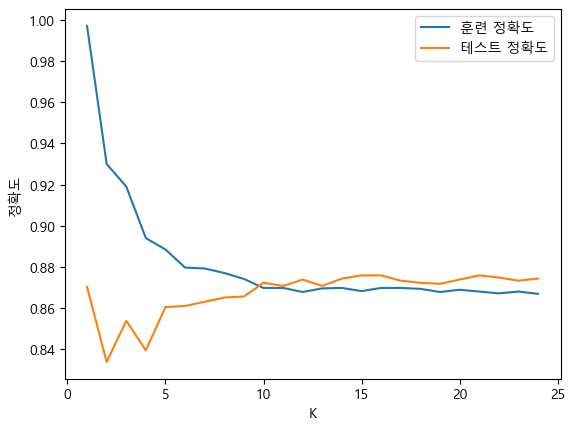

In [20]:
training_accuracy = []
test_accuracy = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    wine_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    wine_knn.fit(X_train, Y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(wine_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_accuracy.append(wine_knn.score(X_test, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_accuracy, label="훈련 정확도")
plt.plot(k_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("K")
plt.legend()

In [21]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_accuracy==max(test_accuracy)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k)

최적의 K값: 15


In [23]:
# 최적의 K값에서 테스트 데이터의 Y예측값
best_wine_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_wine_knn.fit(X_train, Y_train)
best_wine_knn.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
n_test = len(Y_test)
Y_predict = best_wine_knn.predict(X_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [28]:
# 오차행렬(confusion matirx)를 통해 최적의 K에서의 예측 성능 확인
confusion_matrix(Y_test, Y_predict)

array([[ 351,  129],
       [ 113, 1357]], dtype=int64)

In [29]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

In [30]:
result_mat = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'], index =['KNN_best'])
result_mat.loc['KNN_best']=[accuracy, precision, recall, f1]
result_mat
# 예측성공, 실제 참인지, 미래예측율, p+r

,accuracy,precision,recall,f1
KNN_best,0.875897,0.91319,0.923129,0.918133
